<a href="https://colab.research.google.com/github/aziegert/Regression_fiber_opitc_sensors/blob/main/Reggresion_fiber_optic_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [340]:
#Basic
import pathlib
import glob
import os
import pandas as pd
import numpy as np

#Plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA 

#Loading data

In [341]:
#finding all file paths for sensors in air
paths_air = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_??_20/sensor??_air.txt'))
paths_air

['/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_01_20/sensor01_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_02_20/sensor02_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_03_20/sensor03_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_04_20/sensor04_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_05_20/sensor05_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_06_20/sensor06_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_07_20/sensor07_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_08_20/sensor08_air.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_09_20/sensor09_ai

In [342]:
#finding all file paths for sensors in water
paths_water = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_??_20/sensor??_water.txt'))
paths_water

['/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_01_20/sensor01_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_02_20/sensor02_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_03_20/sensor03_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_04_20/sensor04_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_05_20/sensor05_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_06_20/sensor06_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_07_20/sensor07_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_08_20/sensor08_water.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_0

In [343]:
#finding all file paths for sensors in isoproponal
paths_IPA = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_??_20/sensor??_izopropanol.txt'))
paths_IPA

['/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_01_20/sensor01_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_02_20/sensor02_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_03_20/sensor03_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_04_20/sensor04_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_05_20/sensor05_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_06_20/sensor06_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_07_20/sensor07_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks/Data Sets/Dataset-20230228T161655Z-001/sesion_08_20/sensor08_izopropanol.txt',
 '/content/drive/MyDrive/Colab Notebooks

In [344]:
#Creating data frame for characteristics of sensor in air
columns_a = ['wavelength', 'amplitude_air']
df_air = pd.DataFrame(columns=columns_a)

for path in paths_air:
  file_name = os.path.basename(path)
  sensor = file_name.split('_')[0]
  df_new = pd.read_csv(path, header=None, names=columns_a)
  df_new['sensor'] = sensor
  df_air = pd.concat([df_air, df_new], axis=0, ignore_index=True)

df_air['wavelength'] = df_air['wavelength'].map(lambda x: x*10**9)
df_air = df_air.sort_values(['wavelength', 'sensor'], ignore_index=True)
df_air

,wavelength,amplitude_air,sensor
0,1350.0,9.1792,sensor01
1,1350.0,9.7793,sensor02
2,1350.0,7.8831,sensor03
3,1350.0,8.0963,sensor04
4,1350.0,9.4439,sensor05
...,...,...,...
30005,1650.0,2.8220,sensor06
30006,1650.0,3.2780,sensor07
30007,1650.0,4.0038,sensor08
30008,1650.0,2.9142,sensor09


In [345]:
#Creating data frame for characteristics of sensor in water
columns_w = ['wavelength', 'amplitude_water']
df_water = pd.DataFrame(columns=columns_w)


for path in paths_water:
  file_name = os.path.basename(path)
  sensor = file_name.split('_')[0]
  df_new = pd.read_csv(path, header=None, names=columns_w)
  df_new['sensor'] = sensor
  df_water = pd.concat([df_water, df_new], axis=0, ignore_index=True)

df_water['wavelength'] = df_water['wavelength'].map(lambda x: x*10**9)
df_water = df_water.sort_values(['wavelength', 'sensor'], ignore_index=True)
df_water

,wavelength,amplitude_water,sensor
0,1350.0,8.35700,sensor01
1,1350.0,9.06070,sensor02
2,1350.0,7.23540,sensor03
3,1350.0,7.37140,sensor04
4,1350.0,8.63700,sensor05
...,...,...,...
30005,1650.0,-1.52420,sensor06
30006,1650.0,-0.96670,sensor07
30007,1650.0,-0.28101,sensor08
30008,1650.0,-1.21850,sensor09


In [346]:
#Creating data frame for characteristics of sensor in isopropanol
columns_i = ['wavelength', 'amplitude_IPA']
df_IPA = pd.DataFrame(columns=columns_i)


for path in paths_IPA:
  file_name = os.path.basename(path)
  sensor = file_name.split('_')[0]
  df_new = pd.read_csv(path, header=None, names=columns_i)
  df_new['sensor'] = sensor
  df_IPA = pd.concat([df_IPA, df_new], axis=0, ignore_index=True)

df_IPA['wavelength'] = df_IPA['wavelength'].map(lambda x: x*10**9)
df_IPA = df_IPA.sort_values(['wavelength', 'sensor'], ignore_index=True)
df_IPA

,wavelength,amplitude_IPA,sensor
0,1350.0,8.555100,sensor01
1,1350.0,9.254400,sensor02
2,1350.0,7.343200,sensor03
3,1350.0,7.495400,sensor04
4,1350.0,8.973900,sensor05
...,...,...,...
30005,1650.0,-1.009800,sensor06
30006,1650.0,-0.671840,sensor07
30007,1650.0,0.063801,sensor08
30008,1650.0,-1.050800,sensor09


In [347]:
#New Data Frame for all characteristics
df_2 = pd.merge(df_air, df_water)
df_all = pd.merge(df_2, df_IPA)
df_all = df_all[['wavelength',	'amplitude_air', 'amplitude_water',	'amplitude_IPA',	'sensor']]
df_all

,wavelength,amplitude_air,amplitude_water,amplitude_IPA,sensor
0,1350.0,9.1792,8.35700,8.555100,sensor01
1,1350.0,9.7793,9.06070,9.254400,sensor02
2,1350.0,7.8831,7.23540,7.343200,sensor03
3,1350.0,8.0963,7.37140,7.495400,sensor04
4,1350.0,9.4439,8.63700,8.973900,sensor05
...,...,...,...,...,...
30005,1650.0,2.8220,-1.52420,-1.009800,sensor06
30006,1650.0,3.2780,-0.96670,-0.671840,sensor07
30007,1650.0,4.0038,-0.28101,0.063801,sensor08
30008,1650.0,2.9142,-1.21850,-1.050800,sensor09


#Figures

Collection of measurements based on 10 sensors


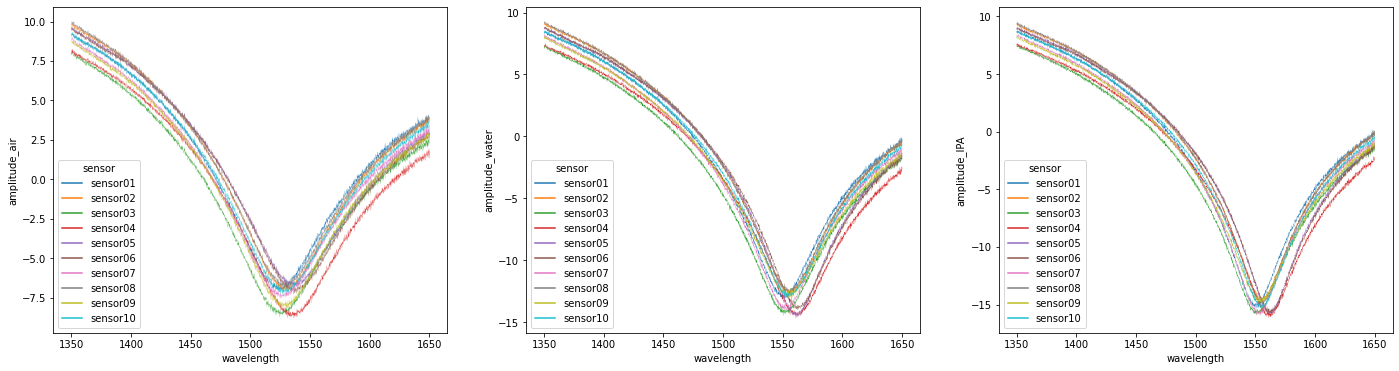

In [348]:
#Creating a figure with three characteristics of sensors
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

sns.lineplot(x='wavelength', y='amplitude_air', data=df_air, ax=ax1, hue='sensor', linewidth=0.17)
sns.lineplot(x='wavelength', y='amplitude_water', data=df_water, ax=ax2, hue='sensor', linewidth=0.2)
sns.lineplot(x='wavelength', y='amplitude_IPA', data=df_IPA, ax=ax3, hue='sensor', linewidth=0.2)

print('Collection of measurements based on 10 sensors')

Text(0, 0.5, 'amplitude [dB]')

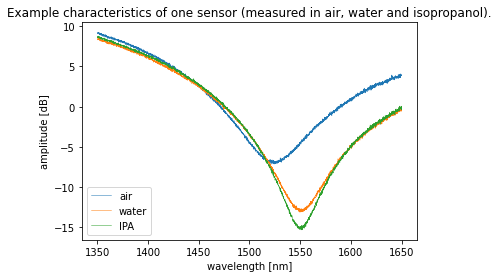

In [349]:
#Creating a figure with three characteristics of sensor number 01
df_all_01 = df_all[df_all['sensor']=='sensor01']

plt.plot(df_all_01['wavelength'], df_all_01['amplitude_air'], label='air', linewidth=0.5)
plt.plot(df_all_01['wavelength'], df_all_01['amplitude_water'], label='water', linewidth=0.5)
plt.plot(df_all_01['wavelength'], df_all_01['amplitude_IPA'], label='IPA', linewidth=0.5)
plt.legend()
plt.title('Example characteristics of one sensor (measured in air, water and isopropanol).')
plt.xlabel('wavelength [nm]')
plt.ylabel('amplitude [dB]')

Text(0, 0.5, 'amplitude_water')

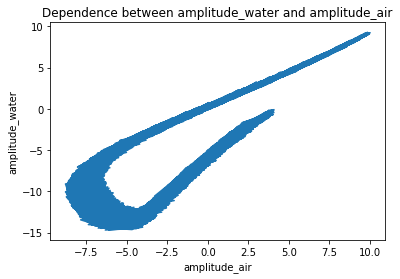

In [350]:
#Creating a figure with dependence between air and water
plt.plot(df_air['amplitude_air'], df_water['amplitude_water'])
plt.title('Dependence between amplitude_water and amplitude_air')
plt.xlabel('amplitude_air')
plt.ylabel('amplitude_water')

Text(0, 0.5, 'amplitude_IPA')

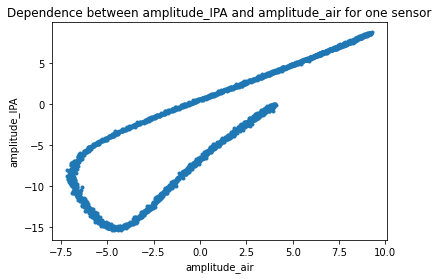

In [351]:
#Creating a figure with dependence between air and water for sensor number 01
df_air_01 = df_air[df_air['sensor']=='sensor01']
df_IPA_01 = df_IPA[df_IPA['sensor']=='sensor01']
plt.plot(df_air_01['amplitude_air'], df_IPA_01['amplitude_IPA'], marker='.', linestyle='none')
plt.title('Dependence between amplitude_IPA and amplitude_air for one sensor')
plt.xlabel('amplitude_air')
plt.ylabel('amplitude_IPA')

In [352]:
#Creating a figure with dependence between air and water for all ten sensors
px.line_3d(df_all, x='amplitude_water', y='wavelength', z='amplitude_air', color='sensor', title='Collection of measurements in air and water based on 10 sensors')

In [353]:
#a figure with dependence between air and water and wavelength for sensor number 01
px.scatter_3d(df_all_01, x='amplitude_water', y='wavelength', z='amplitude_air')

In [354]:
#a figure with dependence between air and water and wavelength for sensor number 01
px.line_3d(df_all_01, x='amplitude_water', y='wavelength', z='amplitude_air')

In [355]:
#a figure with dependence between isopropanol and water and wavelength for sensor number 01
px.line_3d(df_all_01, x='amplitude_water', y='wavelength', z='amplitude_IPA')

#EDA

In [356]:
#basic statistical metrics
df_all.describe()

,wavelength,amplitude_air,amplitude_water,amplitude_IPA
count,30010.000000,30010.000000,30010.000000,30010.000000
mean,1500.000000,0.799809,-1.717725,-1.765555
std,86.632846,4.903714,6.560504,6.973005
min,1350.000000,-8.798200,-14.673000,-16.165000
25%,1425.000000,-3.203700,-6.825600,-6.877225
50%,1500.000000,1.009450,-1.859100,-1.625000
75%,1575.000000,4.794300,4.331600,4.584075
max,1650.000000,10.003000,9.284900,9.551500


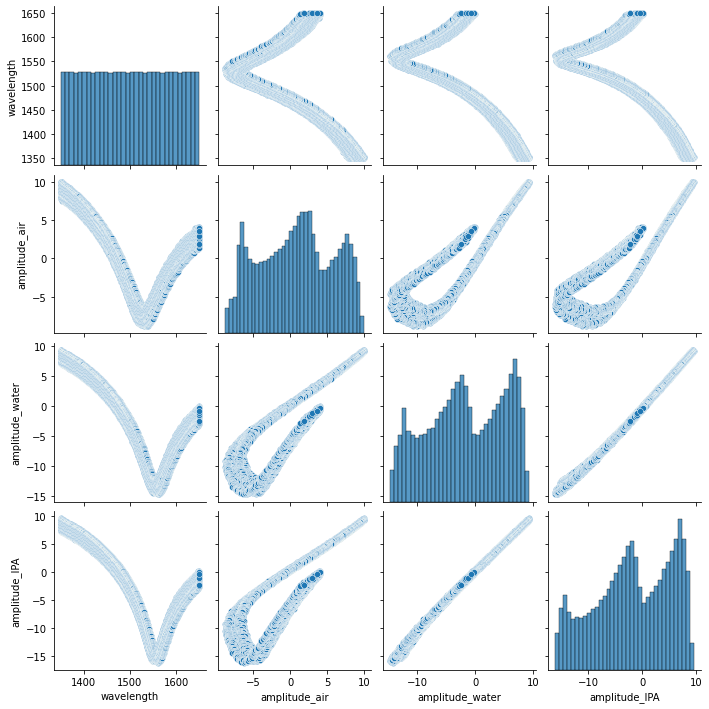

In [357]:
#visualizing the relationships between variables in a dataset
sns.pairplot(df_all)

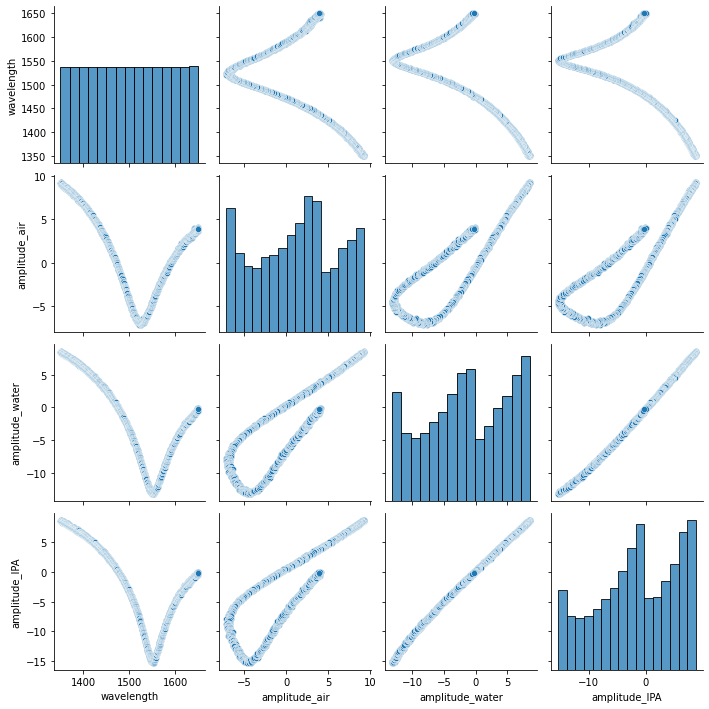

In [358]:
#visualizing the relationships between variables in a dataset for sensor number 01
sns.pairplot(df_all_01)

<AxesSubplot:>

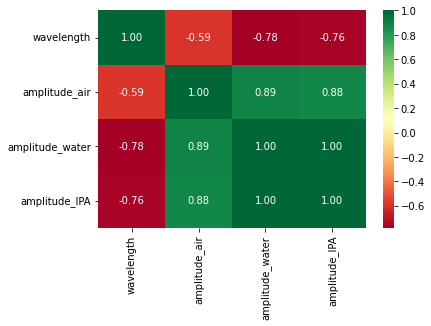

In [359]:
#correlation matrix
corr = df_all.iloc[:, :-1].corr()
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt='.2f')

<AxesSubplot:>

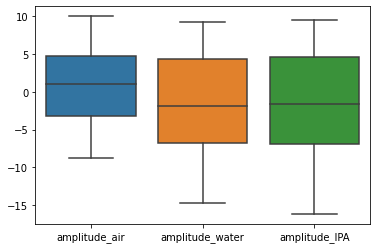

In [360]:
#visualizing the distribution of a dataset
sns.boxplot(data=df_all.iloc[:,1:4])

#X and y sets

In [361]:
#defining X and y sets
X = df_all.iloc[:, 0:2]
yw = df_all['amplitude_water']
yi = df_all['amplitude_IPA']

#Water

In [362]:
#spliting on train and test sets
X_train, X_test, yw_train, yw_test = train_test_split(X, yw, test_size=0.2, random_state=6)

In [363]:
X_train

,wavelength,amplitude_air
421,1354.2,9.45240
29538,1645.3,2.48560
27145,1621.4,1.19340
28383,1633.8,0.96823
9254,1442.5,4.12940
...,...,...
8527,1435.2,4.70140
4714,1397.1,7.29590
10196,1451.9,1.92440
8419,1434.1,4.11260


In [364]:
yw_train = pd.DataFrame(yw_train)
yw_train

,amplitude_water
421,8.7119
29538,-1.7331
27145,-4.1412
28383,-4.1611
9254,3.6879
...,...
8527,4.3643
4714,6.5442
10196,1.8315
8419,3.7767


In [365]:
#standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [366]:
X_train_std

array([[-1.68065697,  1.76194314],
       [ 1.68039775,  0.34315217],
       [ 1.40444719,  0.07999524],
       ...,
       [-0.55260803,  0.22886362],
       [-0.7581277 ,  0.67449122],
       [ 0.48076331, -1.5753152 ]])

In [367]:
#standardization
sc_yw = StandardScaler()
yw_train_std = sc_yw.fit_transform(yw_train)
yw_train_std

array([[ 1.58799136],
       [-0.00414118],
       [-0.37120814],
       ...,
       [ 0.53921121],
       [ 0.83571826],
       [-1.23911472]])

##Regression

In [368]:
#Creating a pipeline that first applies PolynomialFeatures and then uses LinearRegression
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])

params = {'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

#Creating a GridSearchCV object with the pipeline and the hyperparameter grid
gs_rw = GridSearchCV(pipe, param_grid=params, cv=10)

gs_rw.fit(X_train_std, yw_train_std)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             param_grid={'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14]})

In [369]:
gs_rw.best_params_

{'poly__degree': 14}

In [370]:
gs_rw.best_score_

0.9974455803167388

In [371]:
#prediction based on regression model for train set
yw_train_pred_std = gs_rw.predict(X_train_std)

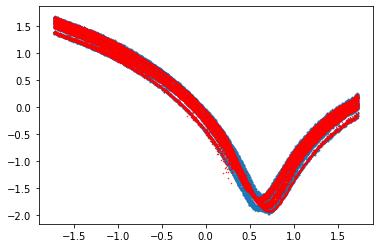

In [372]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(X_train_std[:,0], yw_train_std, s=0.8)
ax.scatter(X_train_std[:,0], yw_train_pred_std, c='r', s=0.2)

plt.show()

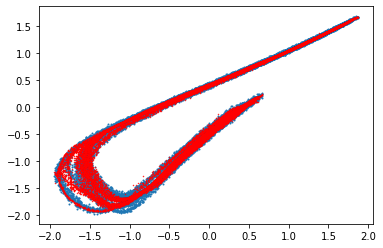

In [373]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(X_train_std[:,1], yw_train_std, s=1)
ax.scatter(X_train_std[:,1], yw_train_pred_std, c='r', s=0.2)

plt.show()

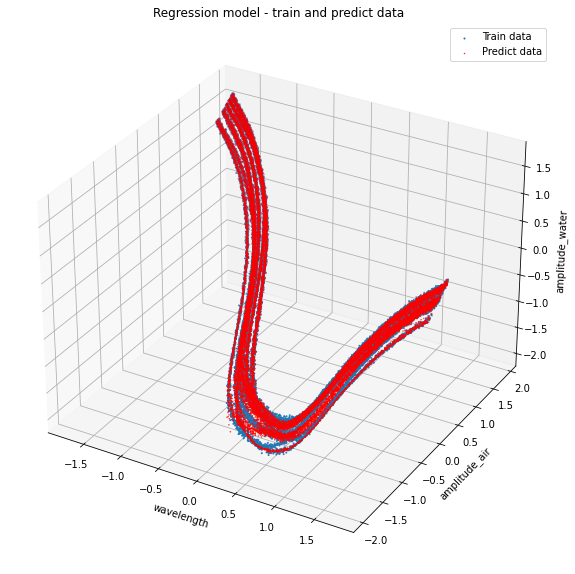

In [374]:
#visualization of predicted and true values in 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_std[:,0], X_train_std[:,1], yw_train_std, s=1, label='Train data')
ax.scatter(X_train_std[:,0], X_train_std[:,1], yw_train_pred_std, c='r', s=0.2, label='Predict data')

ax.set_xlabel('wavelength')
ax.set_ylabel('amplitude_air')
ax.set_zlabel('amplitude_water')

plt.title('Regression model - train and predict data')
ax.legend()
plt.show()

In [375]:
#Transforming the standardized predicted values back to the original scale
yw_train_pred = sc_yw.inverse_transform(yw_train_pred_std)
yw_train_pred

array([[  8.7088209 ],
       [ -1.97157021],
       [ -4.02169959],
       ...,
       [  1.85265707],
       [  3.83266228],
       [-11.36517017]])

In [376]:
np.array(yw_train_pred_std.T[0, :])

array([ 1.58752202, -0.04049122, -0.35299268, ...,  0.54243618,
        0.8442486 , -1.47235874])

In [377]:
np.array(X_train_std[:,0])

array([-1.68065697,  1.68039775,  1.40444719, ..., -0.55260803,
       -0.7581277 ,  0.48076331])

In [378]:
#data frame with original data and predict data for water
df_pred_yw = pd.DataFrame({'wavelength': X_train.iloc[:,0], 'amplitude_air': X_train.iloc[:, 1], 'amplitude_water': yw_train.iloc[:, 0], 'pred_amplitude_water': yw_train_pred.T[0, :]})
df_pred_yw

,wavelength,amplitude_air,amplitude_water,pred_amplitude_water
421,1354.2,9.45240,8.7119,8.708821
29538,1645.3,2.48560,-1.7331,-1.971570
27145,1621.4,1.19340,-4.1412,-4.021700
28383,1633.8,0.96823,-4.1611,-3.870823
9254,1442.5,4.12940,3.6879,3.752131
...,...,...,...,...
8527,1435.2,4.70140,4.3643,4.274239
4714,1397.1,7.29590,6.5442,6.592394
10196,1451.9,1.92440,1.8315,1.852657
8419,1434.1,4.11260,3.7767,3.832662


In [379]:
#sorting data and adding column with percent of different between predict and true value
df_pred_yw = df_pred_yw.sort_values(['wavelength', 'amplitude_air'])
df_pred_yw['(true-pred)/true (%)'] = df_pred_yw.apply(lambda row: (row['pred_amplitude_water']-row['amplitude_water'])/row['amplitude_water']*100, axis=1)
df_pred_yw

,wavelength,amplitude_air,amplitude_water,pred_amplitude_water,(true-pred)/true (%)
2,1350.0,7.8831,7.23540,7.310650,1.040019
3,1350.0,8.0963,7.37140,7.293579,-1.055716
8,1350.0,8.6910,7.87060,7.905270,0.440497
6,1350.0,8.8064,8.11800,8.022922,-1.171197
0,1350.0,9.1792,8.35700,8.423257,0.792836
...,...,...,...,...,...
30005,1650.0,2.8220,-1.52420,-1.447868,-5.008017
30008,1650.0,2.9142,-1.21850,-1.356461,11.322220
30004,1650.0,3.0680,-1.32990,-1.171892,-11.881205
30001,1650.0,3.8886,-0.30843,-0.523797,69.826781


In [380]:
df_pred_yw.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,wavelength,amplitude_air,amplitude_water,pred_amplitude_water,(true-pred)/true (%)
count,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000
mean,1499.761225,0.800593,-1.705932,-1.705932,-0.079372
std,86.611521,4.910480,6.560520,6.552218,39.066284
min,1350.000000,-8.798200,-14.673000,-14.370311,-2046.767792
5%,1364.900000,-6.913720,-12.579000,-12.662770,-10.346160
10%,1379.800000,-6.258450,-11.350900,-11.409575,-7.257860
25%,1424.800000,-3.217825,-6.815325,-6.864734,-2.392114
50%,1499.700000,1.006000,-1.841150,-1.835454,0.135013
75%,1574.600000,4.806150,4.336075,4.331623,2.853882
90%,1620.000000,7.657960,6.947490,6.946636,7.056889


#Isopropanol

In [381]:
#spliting on train and test sets
X_train, X_test, yi_train, yi_test = train_test_split(X, yi, test_size=0.2, random_state=6)

In [382]:
X_train

,wavelength,amplitude_air
421,1354.2,9.45240
29538,1645.3,2.48560
27145,1621.4,1.19340
28383,1633.8,0.96823
9254,1442.5,4.12940
...,...,...
8527,1435.2,4.70140
4714,1397.1,7.29590
10196,1451.9,1.92440
8419,1434.1,4.11260


In [383]:
yi_train = pd.DataFrame(yi_train)
yi_train

,amplitude_IPA
421,8.9121
29538,-1.4402
27145,-3.9503
28383,-3.6147
9254,3.9759
...,...
8527,4.6286
4714,6.8846
10196,2.1081
8419,4.0264


In [384]:
#standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [385]:
X_train_std

array([[-1.68065697,  1.76194314],
       [ 1.68039775,  0.34315217],
       [ 1.40444719,  0.07999524],
       ...,
       [-0.55260803,  0.22886362],
       [-0.7581277 ,  0.67449122],
       [ 0.48076331, -1.5753152 ]])

In [386]:
#standardization
sc_yi = StandardScaler()
yi_train_std = sc_yw.fit_transform(yi_train)
yi_train_std

array([[ 1.52950671],
       [ 0.04501128],
       [-0.31493114],
       ...,
       [ 0.55382914],
       [ 0.82890884],
       [-1.24281428]])

##Regression

In [387]:
#Creating a pipeline that first applies PolynomialFeatures and then uses LinearRegression
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])

params = {'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

#Creating a GridSearchCV object with the pipeline and the hyperparameter grid
gs_ri = GridSearchCV(pipe, param_grid=params, cv=10)

gs_ri.fit(X_train_std, yi_train_std)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             param_grid={'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14]})

In [388]:
gs_ri.best_params_

{'poly__degree': 14}

In [389]:
gs_ri.best_score_

0.9969215269836867

In [390]:
#prediction based on regression model for train set
yi_train_pred_std = gs_ri.predict(X_train_std)

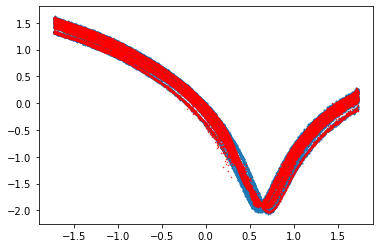

In [391]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(X_train_std[:,0], yi_train_std, s=1)
ax.scatter(X_train_std[:,0], yi_train_pred_std, c='r', s=0.2)
plt.show()

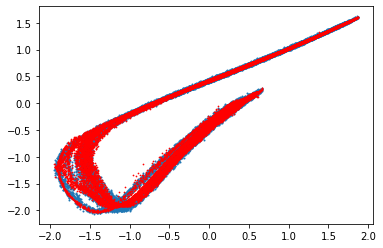

In [392]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(X_train_std[:,1], yi_train_std, s=1)
ax.scatter(X_train_std[:,1], yi_train_pred_std, c='r', s=0.5)

plt.show()

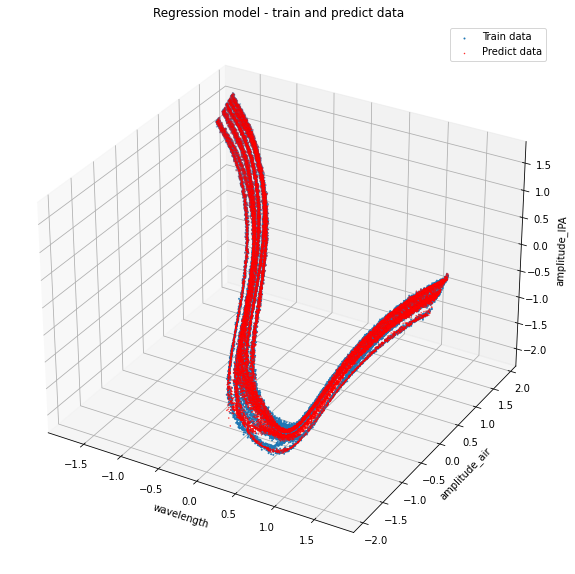

In [393]:
#visualization of predicted and true values in 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_std[:,0], X_train_std[:,1], yi_train_std, s=1, label='Train data')
ax.scatter(X_train_std[:,0], X_train_std[:,1], yi_train_pred_std, c='r', s=0.2, label='Predict data')

ax.set_xlabel('wavelength')
ax.set_ylabel('amplitude_air')
ax.set_zlabel('amplitude_IPA')

plt.title('Regression model - train and predict data')
ax.legend()
plt.show()

#Isopropanol vs water

In [394]:
Xw = df_all[['wavelength', 'amplitude_water']]
yi = df_all['amplitude_IPA']

In [395]:
#spliting on train and test sets
Xw_train, Xw_test, yi_train, yi_test = train_test_split(Xw, yi, test_size=0.2, random_state=6)

In [396]:
Xw_train

,wavelength,amplitude_water
421,1354.2,8.7119
29538,1645.3,-1.7331
27145,1621.4,-4.1412
28383,1633.8,-4.1611
9254,1442.5,3.6879
...,...,...
8527,1435.2,4.3643
4714,1397.1,6.5442
10196,1451.9,1.8315
8419,1434.1,3.7767


In [397]:
yi_train = pd.DataFrame(yi_train)
yi_train

,amplitude_IPA
421,8.9121
29538,-1.4402
27145,-3.9503
28383,-3.6147
9254,3.9759
...,...
8527,4.6286
4714,6.8846
10196,2.1081
8419,4.0264


In [398]:
#standardization
sc = StandardScaler()
Xw_train_std = sc.fit_transform(Xw_train)

In [399]:
Xw_train_std

array([[-1.68065697,  1.58799136],
       [ 1.68039775, -0.00414118],
       [ 1.40444719, -0.37120814],
       ...,
       [-0.55260803,  0.53921121],
       [-0.7581277 ,  0.83571826],
       [ 0.48076331, -1.23911472]])

In [400]:
#standardization
sc_yi = StandardScaler()
yi_train_std = sc_yi.fit_transform(yi_train)
yi_train_std

array([[ 1.52950671],
       [ 0.04501128],
       [-0.31493114],
       ...,
       [ 0.55382914],
       [ 0.82890884],
       [-1.24281428]])

##Regression

In [401]:
#Creating a pipeline that first applies PolynomialFeatures and then uses LinearRegression
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])

params = {'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

#Creating a GridSearchCV object with the pipeline and the hyperparameter grid
gs_ri_w = GridSearchCV(pipe, param_grid=params, cv=10)

gs_ri_w.fit(Xw_train_std, yi_train_std)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             param_grid={'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14]})

In [402]:
gs_ri_w.best_params_

{'poly__degree': 14}

In [403]:
gs_ri_w.best_score_

0.9993221147670411

In [404]:
#prediction based on regression model for train set
yi_train_pred_std = gs_ri_w.predict(Xw_train_std)

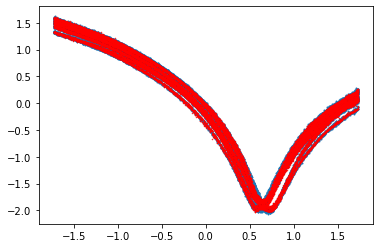

In [405]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(Xw_train_std[:,0], yi_train_std, s=1)
ax.scatter(Xw_train_std[:,0], yi_train_pred_std, c='r', s=0.2)
plt.show()

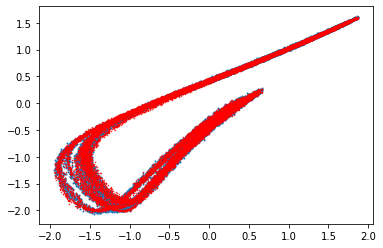

In [406]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(X_train_std[:,1], yi_train_std, s=1)
ax.scatter(X_train_std[:,1], yi_train_pred_std, c='r', s=0.2)

plt.show()

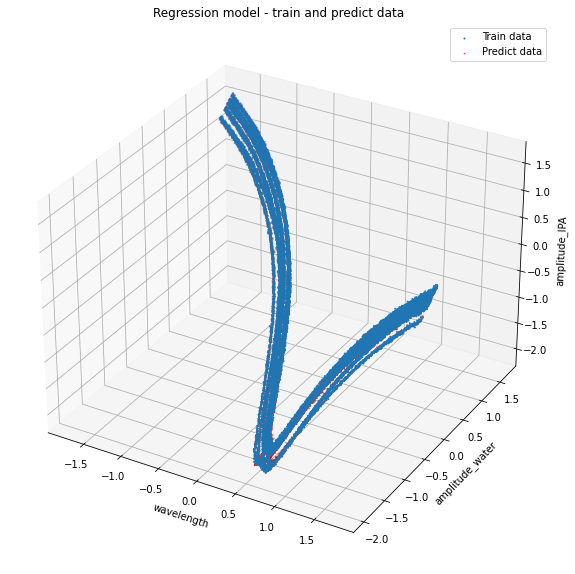

In [407]:
#visualization of predicted and true values in 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xw_train_std[:,0], Xw_train_std[:,1], yi_train_std, s=1, label='Train data')
ax.scatter(Xw_train_std[:,0], Xw_train_std[:,1], yi_train_pred_std, c='r', s=0.2, label='Predict data')

ax.set_xlabel('wavelength')
ax.set_ylabel('amplitude_water')
ax.set_zlabel('amplitude_IPA')

plt.title('Regression model - train and predict data')
ax.legend()
plt.show()

#Air vs water

In [408]:
Xw = df_all[['wavelength', 'amplitude_water']]
ya = df_all['amplitude_air']

In [409]:
#spliting on train and test sets
Xw_train, Xw_test, ya_train, ya_test = train_test_split(Xw, ya, test_size=0.2, random_state=6)

In [410]:
Xw_train

,wavelength,amplitude_water
421,1354.2,8.7119
29538,1645.3,-1.7331
27145,1621.4,-4.1412
28383,1633.8,-4.1611
9254,1442.5,3.6879
...,...,...
8527,1435.2,4.3643
4714,1397.1,6.5442
10196,1451.9,1.8315
8419,1434.1,3.7767


In [411]:
ya_train = pd.DataFrame(ya_train)
ya_train

,amplitude_air
421,9.45240
29538,2.48560
27145,1.19340
28383,0.96823
9254,4.12940
...,...
8527,4.70140
4714,7.29590
10196,1.92440
8419,4.11260


In [412]:
#standardization
sc = StandardScaler()
Xw_train_std = sc.fit_transform(Xw_train)

In [413]:
Xw_train_std

array([[-1.68065697,  1.58799136],
       [ 1.68039775, -0.00414118],
       [ 1.40444719, -0.37120814],
       ...,
       [-0.55260803,  0.53921121],
       [-0.7581277 ,  0.83571826],
       [ 0.48076331, -1.23911472]])

In [414]:
#standardization
sc_ya = StandardScaler()
ya_train_std = sc_ya.fit_transform(ya_train)
ya_train_std

array([[ 1.76194314],
       [ 0.34315217],
       [ 0.07999524],
       ...,
       [ 0.22886362],
       [ 0.67449122],
       [-1.5753152 ]])

##Regression

In [415]:
#Creating a pipeline that first applies PolynomialFeatures and then uses LinearRegression
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])

params = {'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

#Creating a GridSearchCV object with the pipeline and the hyperparameter grid
gs_ra_w = GridSearchCV(pipe, param_grid=params, cv=10)

gs_ra_w.fit(Xw_train_std, ya_train_std)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             param_grid={'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14]})

In [416]:
gs_ra_w.best_params_

{'poly__degree': 14}

In [417]:
gs_ra_w.best_score_

0.9965357817295992

In [418]:
#prediction based on regression model for train set
ya_train_pred_std = gs_ra_w.predict(Xw_train_std)

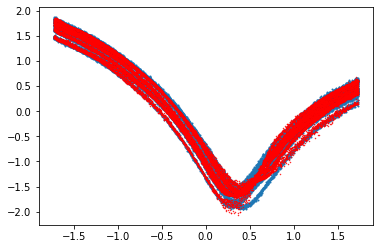

In [419]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(Xw_train_std[:,0], ya_train_std, s=1)
ax.scatter(Xw_train_std[:,0], ya_train_pred_std, c='r', s=0.2)
plt.show()

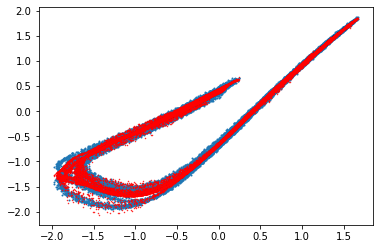

In [420]:
#visualization of predicted and true values
fig, ax = plt.subplots()

ax.scatter(Xw_train_std[:,1], ya_train_std, s=1)
ax.scatter(Xw_train_std[:,1], ya_train_pred_std, c='r', s=0.2)

plt.show()

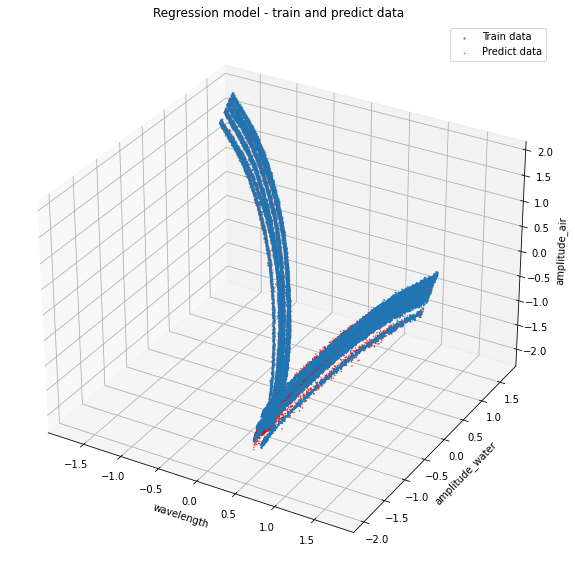

In [421]:
#visualization of predicted and true values in 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xw_train_std[:,0], Xw_train_std[:,1], ya_train_std, s=1, label='Train data')
ax.scatter(Xw_train_std[:,0], Xw_train_std[:,1], ya_train_pred_std, c='r', s=0.2, label='Predict data')

ax.set_xlabel('wavelength')
ax.set_ylabel('amplitude_water')
ax.set_zlabel('amplitude_air')

plt.title('Regression model - train and predict data')
ax.legend()
plt.show()